# Difference in Means Analysis on Light-outages and Crime
## Garrett Eason, Chris Broll, Shilpa Rajbhandari
*Note* Most cleaning steps have been omitted.

In [32]:
#%% Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#%% Locations
Windows = 'C:/Users/Sade/Documents/GitHub/lights-and-crime/Lights and Crime Garrett/Data'
Linux = '/home/sade/Desktop/Git Cloned Repos/lights-and-crime/Lights and Crime Garrett/Data'

choice = Linux

## EDA
### Data
Crimes - Data set about crimes.
Lights - Data set about light outages.
iSlims - Older data set containing information regarding public work (including light outages).
fc - Data set containing failure codes for iSlims and City Work data.

In [4]:
#%% EDA Data
Crimes = pd.read_excel(choice + '/crimes.xlsx')
iSlims = pd.read_excel(choice + '/iSlims_final.xlsx')
fc = pd.read_excel(choice + '/islims_failure_codes.xlsx')

### EDA iSlims

In [5]:
iSlims[['daysToComplete', 'daysLate']].describe()

,daysToComplete,daysLate
count,178337.000000,178337.000000
mean,2.064552,0.092875
std,2.366900,0.766011
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,3.000000,0.000000
max,23.000000,17.000000


On average it takes 2 days to complete a task and the completion of tasks are rarely late (excluding completion tasks beyond 14 days).


In [7]:
iSlims['ProblemID'].value_counts().head(5)

2      173121
13       1273
433       697
430       562
196       489
Name: ProblemID, dtype: int64

In [10]:
c = [2, 13, 433, 430, 196]
for i in range(len(fc)):
    if fc.loc[i,'failcodeID'] in c:
        print(str(fc.loc[i,'failcodeID']) + ' Description: ' +fc.loc[i, 'description'])


2 Description: (Light out)
13 Description: (No current)
196 Description: (Underpass light out)
430 Description: (DDOT Refer)
433 Description: (No Current to Over Head)


The vast majority of observation fail codes are lights going out as can be seen by the top 5 counts of failure codes.

(array([ 46153.,  49868.,  28336.,  16700.,  13428.,   9860.,   7725.,
          2182.,   1089.,    668.,    439.,    365.,    319.,    188.,
           189.,    183.,    114.,    112.,     91.,     72.,     97.,
            65.,     94.]),
 array([ -1.        ,   0.04347826,   1.08695652,   2.13043478,
          3.17391304,   4.2173913 ,   5.26086957,   6.30434783,
          7.34782609,   8.39130435,   9.43478261,  10.47826087,
         11.52173913,  12.56521739,  13.60869565,  14.65217391,
         15.69565217,  16.73913043,  17.7826087 ,  18.82608696,
         19.86956522,  20.91304348,  21.95652174,  23.        ]),
 <a list of 23 Patch objects>)

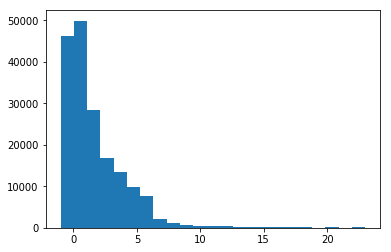

In [12]:
plt.hist(iSlims['daysToComplete'], bins = 23)
# Something to note: A Poisson distribution for count data.  Could do a GLM to predict what contributes to repair time.
# Also Interesting jump at 14ish days and predictible drop after 5ish days.

Histogram of the days it took to complete a work order.  As expected we can see a large drop off after 5 days.

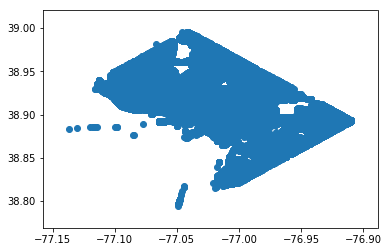

In [13]:
plt.scatter(iSlims['gpsX'], iSlims['gpsY'])

As we can see it looks like the location data is plausible.

### EDA Crime

Taking a look at several variables in the Crimes data set:

In [17]:
Crimes[['SHIFT', 'METHOD', 'OFFENSE']].describe()
for i in ['SHIFT', 'METHOD', 'OFFENSE']:
    print(i + ':',Counter(Crimes[i]))

SHIFT: Counter({'EVENING': 120273, 'DAY': 108579, 'MIDNIGHT': 53042})
METHOD: Counter({'OTHERS': 256577, 'GUN': 16118, 'KNIFE': 9199})
OFFENSE: Counter({'THEFT/OTHER': 102156, 'THEFT F/AUTO': 82599, 'ROBBERY': 27559, 'BURGLARY': 24257, 'MOTOR VEHICLE THEFT': 23669, 'ASSAULT W/DANGEROUS WEAPON': 18311, 'SEX ABUSE': 2186, 'HOMICIDE': 942, 'ARSON': 215})


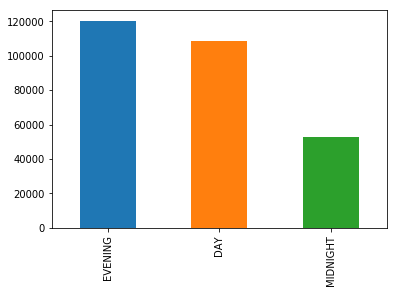

In [18]:
Crimes['SHIFT'].value_counts().plot(kind='bar')

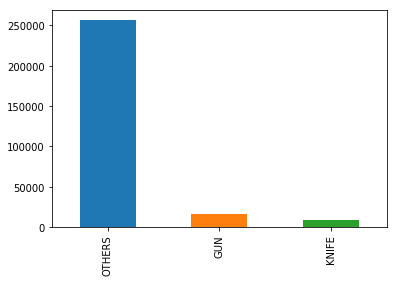

In [20]:
Crimes['METHOD'].value_counts().plot(kind='bar')

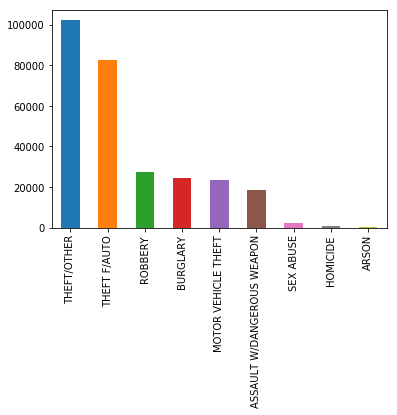

In [21]:
Crimes['OFFENSE'].value_counts().plot(kind='bar')

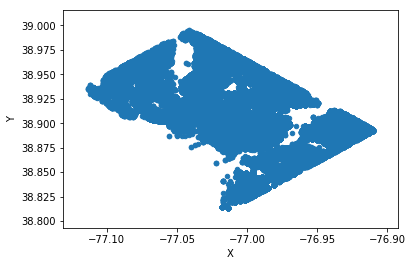

In [22]:
Crimes.plot(kind='scatter',x='X',y='Y')

Again the Location data looks plausible.

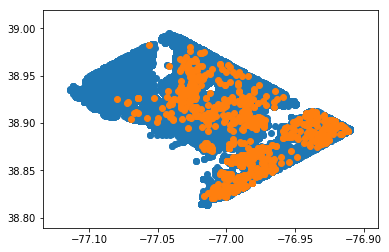

In [27]:
plt.scatter(Crimes['X'], Crimes['Y'])
plt.scatter(Crimes[Crimes['OFFENSE'] == 'HOMICIDE']['X'], Crimes[Crimes['OFFENSE'] == 'HOMICIDE']['Y'])

Map of Homicides layed over all other criminal activities.

## Final Data Cleaning
We start by loading our three main data sets, these include: "Lights.xlsx" - a data set with all the lightoutages (iSlims + CityWork data), "geoLights0.xlsx" - a data set that includes all the light-outages merged with crimes in a 1/4th block radius (1/2 a block diameter) that did not happen in a 20 day (10 days before repair and 10 days after repair) window, and "geoLights1.xlsx" - a data set that includes all the light-outages merged with crimes in a 1/4th block radius that did happen in a 20 day window.

After loading our data we do one final quick cleaning and manipulate our "geoLights1.xlsx" into two new data sets. For the "L_yesCR_dup_only" data set, we pull out all the instances of multiple crimes being mapped to a single street light outage. For the "L_yesCR_nodup" data set, we map all multiple instances


In [ ]:
L_Full = pd.read_excel(choice + '/Final_Lights.xlsx')
L_yesCR_dup_only.to_excel(choice + '/Rampage.xlsx')

In [ ]:
#%% Difference in Means Analysis

# Splitting the crimes into before and after 10 day categories (note* 1 day buffer to avoid category errors)
L_full['CR_Before_Fix'] = 0
for i in L_full[L_full['Lightout&CR'] == 1].index:
    if (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days >= 0 and (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days <= 10:
        L_full.loc[i, 'CR_Before_Fix'] = 1
L_full['CR_After_Fix'] = 0
for i in L_full[L_full['Lightout&CR'] == 1].index:
    if (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days < 0 and (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days >= -10:
        L_full.loc[i, 'CR_After_Fix'] = 1

# Raw Sums:
sum(L_full['CR_Before_Fix'])
sum(L_full['CR_After_Fix'])

# Because we will only consider the binary crime(s) took place or not, we can consider the following means as differences in probabilities.
# Estimates are based on 10 "days out".
# Unconditional difference in means: E[u]-E[t]
meandif = sum(L_full['CR_Before_Fix'])/len(L_full) - sum(L_full['CR_After_Fix'])/len(L_full)
# Difference in Probability: approximately 0.17%

# For a Binary Random Variable:
# Var(x) = E[x^2] - E[x]^2
#        = E[x]   - E[x]^2 remember x = 1 or 0
#        = P(x = 1) - P(x = 1)^2
#        = P(x = 1)(1 - P(x = 1))
VarB = sum(L_full['CR_Before_Fix'])/len(L_full)*(1 - sum(L_full['CR_Before_Fix'])/len(L_full))
VarA = sum(L_full['CR_After_Fix'])/len(L_full)*(1 - sum(L_full['CR_After_Fix'])/len(L_full))
Sdif = np.sqrt((VarB/len(L_full))+(VarA/len(L_full)))
t = meandif/Sdif # t is approximately 3.44
# P-value is approximately 0; estimate is statistically significant.
# This evidence supports the conculsion that light outages do affect crime generally by a very small margin unconditionally.
# Given the magnitude of our esitmate, it is likely that light outages do not effect crime.

# Conditional difference in means: E[u\'Lightout&CR' = 1] - E[t\'Lightout&CR' = 1]
meandif = sum(L_full['CR_Before_Fix'])/sum(L_full['Lightout&CR']) - sum(L_full['CR_After_Fix'])/sum(L_full['Lightout&CR'])
# Difference in Probability: approximately 3.5%

VarB = sum(L_full['CR_Before_Fix'])/sum(L_full['Lightout&CR'])*(1 - sum(L_full['CR_Before_Fix'])/sum(L_full['Lightout&CR']))
VarA = sum(L_full['CR_After_Fix'])/sum(L_full['Lightout&CR'])*(1 - sum(L_full['CR_After_Fix'])/sum(L_full['Lightout&CR']))
Sdif = np.sqrt((VarB/sum(L_full['Lightout&CR']))+(VarA/sum(L_full['Lightout&CR'])))
t = meandif/Sdif # t is approximately 4.69
# P-value is approximately 0; estimate is statistically significant.
# This evidence supports the conculsion that if a crime is to occur then it is 3.5 percentage points more likely to occur when the light is out.


In [ ]:
L_full['CR_Before_Fix'] = 0
for i in L_full[L_full['Lightout&CR'] == 1].index:
    if (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days >= 0 and (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days <= 10:
        L_full.loc[i, 'CR_Before_Fix'] = 1
L_full['CR_After_Fix'] = 0
for i in L_full[L_full['Lightout&CR'] == 1].index:
    if (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days < 0 and (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days >= -10:
        L_full.loc[i, 'CR_After_Fix'] = 1

# Raw Sums:
sum(L_full['CR_Before_Fix'])
sum(L_full['CR_After_Fix'])

In [ ]:
# Unconditional difference in means: E[u]-E[t]
meandif = sum(L_full['CR_Before_Fix'])/len(L_full) - sum(L_full['CR_After_Fix'])/len(L_full)
#

In [ ]:
#        = P(x = 1)(1 - P(x = 1))
VarB = sum(L_full['CR_Before_Fix'])/len(L_full)*(1 - sum(L_full['CR_Before_Fix'])/len(L_full))
VarA = sum(L_full['CR_After_Fix'])/len(L_full)*(1 - sum(L_full['CR_After_Fix'])/len(L_full))
Sdif = np.sqrt((VarB/len(L_full))+(VarA/len(L_full)))
t = meandif/Sdif # t is approximately 3.44


In [ ]:
meandif = sum(L_full['CR_Before_Fix'])/sum(L_full['Lightout&CR']) - sum(L_full['CR_After_Fix'])/sum(L_full['Lightout&CR'])
meandif

In [ ]:
VarB = sum(L_full['CR_Before_Fix'])/sum(L_full['Lightout&CR'])*(1 - sum(L_full['CR_Before_Fix'])/sum(L_full['Lightout&CR']))
VarA = sum(L_full['CR_After_Fix'])/sum(L_full['Lightout&CR'])*(1 - sum(L_full['CR_After_Fix'])/sum(L_full['Lightout&CR']))
Sdif = np.sqrt((VarB/sum(L_full['Lightout&CR']))+(VarA/sum(L_full['Lightout&CR'])))
t = meandif/Sdif # t is approximately 4.69
t

In [ ]:
# Let's take a look at different conditional estimates for different "days out".
for a in range(1,11):
    L_full['CR_Before_Fix'] = 0
    for i in L_full[L_full['Lightout&CR'] == 1].index:
        if (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days >= 0 and (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days <= a:
            L_full.loc[i, 'CR_Before_Fix'] = 1
    L_full['CR_After_Fix'] = 0
    for i in L_full[L_full['Lightout&CR'] == 1].index:
        if (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days < 0 and (L_full.loc[i, 'WoCompleted'] - L_full.loc[i, 'REPORT_DAT']).days >= -a:
            L_full.loc[i, 'CR_After_Fix'] = 1
    print(sum(L_full['CR_Before_Fix'])/sum(L_full['Lightout&CR']) - sum(L_full['CR_After_Fix'])/sum(L_full['Lightout&CR']))

In [ ]:
#%% Interesting plots and other

# Interesting Clustering of multiple crimes
plt.figure(1)
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'])
plt.scatter(L_yesCR_dup_only['gpsX_left'], L_yesCR_dup_only['gpsY_left'])
